### Discriminant Analysis

Discriminant Analysis는 질적 척도로 이루어진 종속변수를 분류할 때 쓰이는 기법으로 기계학습보다는 통계기반의 데이터 분류 모델에 더 가깝다.

종속변수의 범주가 두 개일 경우는 Normal Discriminant Analysis 혹은 Two-group Discriminant Analysis 이라 부른다. 범주가 세 개 이상일 경우는 Multiple Discriminant Analysis이라 한다. 그리고 범주를 구분하는 결정경계선을 산출하는 방식에 따라 LDA(Linear Discriminant Analysis)와 QDA(Quadratic Discriminant Analysis)으로 구분된다.

![LDA](https://mblogthumb-phinf.pstatic.net/MjAyMDEyMjBfMjk0/MDAxNjA4NDYzNzI1MTU3.QYnhatteUTCxbfN_jdzyzmhkqSonNttH4M7qNTAaNVQg.JW9kVAgS5Zp5egtk7c62cIeOq9El97YpRaz6uGI50nkg.PNG.chunsa0127/image.png?type=w800)

![LDAQDA](https://blog.kakaocdn.net/dn/vMUvo/btqBS6dD6kY/e1ki6Owa4fNWTzzWlbGTR0/img.png)

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# https://www.kaggle.com/datasets/kukuroo3/body-performance-data
df = pd.read_csv('../input/body-performance-data/bodyPerformance.csv')

In [4]:
df.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

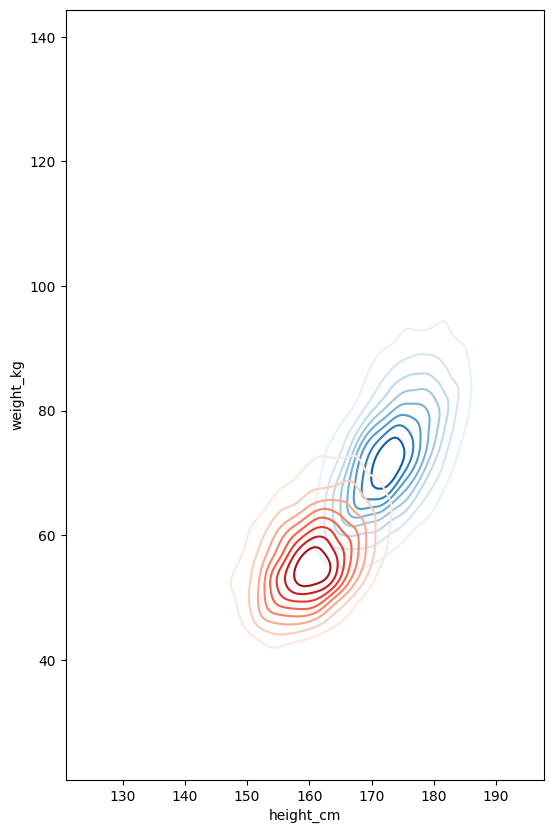

In [9]:
# 성별 분포 시각화 (키X몸무게)

# 성별 구분 데이터셋 생성
df_man = df.loc[df['gender'] == 'M']
df_woman = df.loc[df['gender'] == 'F']

# 그래프 설정
f, ax = plt.subplots(figsize=(10, 10))
ax.set_aspect("equal")

# 가로길이, 세로길이 변수 축 설정
ax = sns.kdeplot(x = df_man.height_cm, y = df_man.weight_kg, cmap="Blues", 
                 fill=False, thresh=False, cbar=False)
ax = sns.kdeplot(x = df_woman.height_cm, y = df_woman.weight_kg, cmap="Reds", 
                 fill=False, thresh=False)

red = sns.color_palette("Reds")[-2]
blue = sns.color_palette("Blues")[-2]

In [10]:
# 독립변수 정규화

# 독립변수, 종속변수 분리
df_x = df.drop(['gender','age','class'],axis=1)
df_y = df[['gender']]

# 데이터 정규화 적용
MinMaxScaler = MinMaxScaler()
df_minmax = MinMaxScaler.fit_transform(df_x)

# 컬럼명 결합
df_x = pd.DataFrame(data=df_minmax, columns=df_x.columns)

df_x.head()

,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm
0,0.687500,0.437746,0.242706,0.512164,0.646766,0.778723,0.182353,0.7500,0.716172
1,0.581395,0.263864,0.168435,0.492958,0.626866,0.516312,0.173529,0.6625,0.755776
2,0.793605,0.462433,0.226790,0.588988,0.756219,0.635461,0.155462,0.6125,0.597360
3,0.719477,0.400716,0.204244,0.486556,0.731343,0.587234,0.168908,0.6625,0.722772
4,0.709302,0.370304,0.187003,0.448143,0.631841,0.617021,0.218908,0.5625,0.716172


In [11]:
# 학습셋과 테스트셋 분리하여 생성(7:3)
x_train, x_test, y_train, y_test = train_test_split(
    df_x,df_y,test_size=0.3,random_state=10)

# 학습셋과 검증셋이 잘 나뉘었는지 확인
print('train data 개수: ', len(x_train))
print('test data 개수: ', len(x_test))

train data 개수:  9375
test data 개수:  4018


In [14]:
# Linear Discriminant Analysis 모델 적용

LDA_1=LinearDiscriminantAnalysis(store_covariance=True)

LDA_1.fit(x_train, y_train) # LDA 적합
y_train_pred=LDA_1.predict(x_train)
y_test_pred=LDA_1.predict(x_test)

print('Train Set Accuracy : ', accuracy_score(y_train, y_train_pred)) # 학습셋 accuracy
print('Test Set Accuracy : ', accuracy_score(y_test, y_test_pred)) # 테스트셋 accuracy

Train Set Accuracy :  0.9784533333333333
Test Set Accuracy :  0.9810851169736187


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [13]:
# 선형 판별분석 모델 상수와 계수 값 출력

print('Intercept: ', LDA_1.intercept_)
print('Coefficient: ', LDA_1.coef_)

Intercept:  [-14.29894437]
Coefficient:  [[ -1.35700815  26.12716198 -29.708912     4.0661269   10.03194981
   18.0750803  -57.34544185  -3.81399695  15.48677609]]


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_33/3780834705.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'],
/tmp/ipykernel_33/3780834705.py:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level functi

<Axes: xlabel='lda_component'>

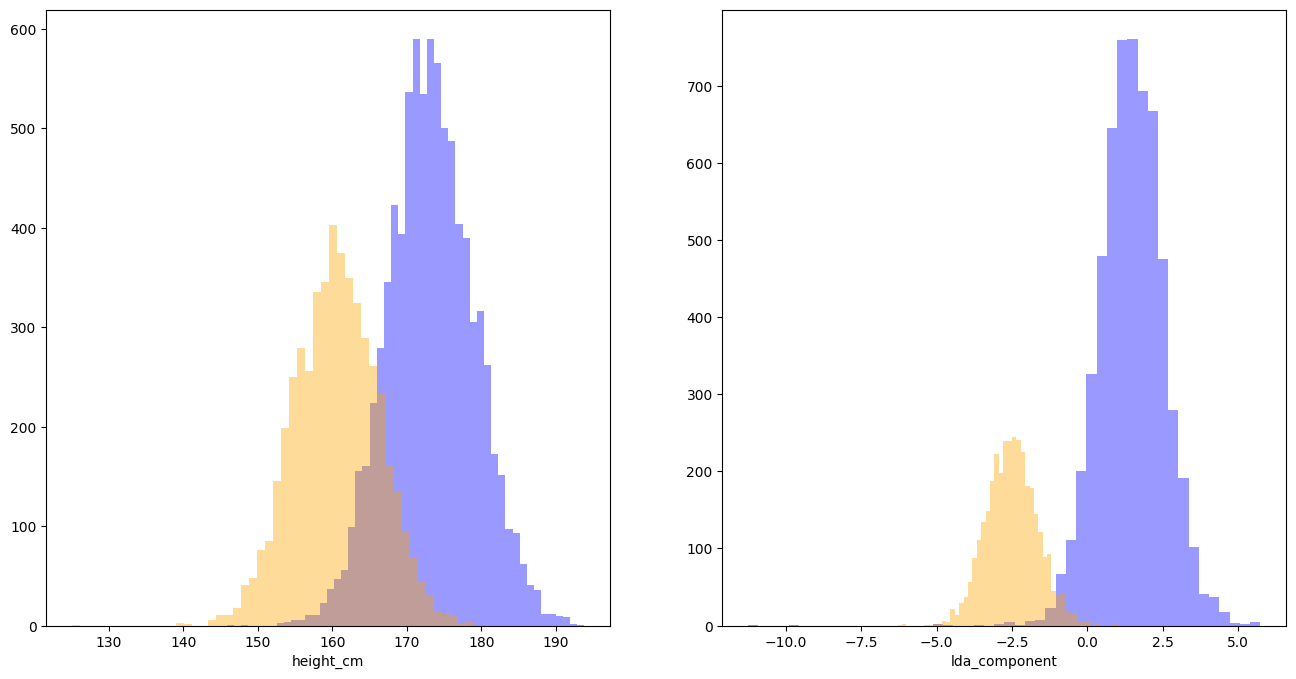

In [17]:
# 선형 판별분석 차원축소 적용

# 주성분 한개로 설정
lda_com = LinearDiscriminantAnalysis(n_components=1)
lda_com.fit(x_train, y_train)
df_lda_com = lda_com.transform(x_train)
df_lda_component = pd.DataFrame(df_lda_com,columns=['lda_component'])

# 종속변수 데이터셋 인덱스 초기화 및 결합
y_train_index = y_train.reset_index()
df_lda_component['target'] = y_train_index['gender']

# 차원축소 요소 분별력 비교 시각화 설정
fig, axs = plt.subplots(figsize=(16,8) , ncols=2 , nrows=1)

# 키 요소의 분별력
sns.distplot(df.loc[df['gender'] == 'M', 'height_cm'], 
             hist=True, kde=False, color="blue", 
             label = 'man', ax=axs[0])
sns.distplot(df.loc[df['gender'] == 'F', 'height_cm'], 
             hist=True, kde=False, color="orange", 
             label = 'woman', ax=axs[0])

# 차원축소 주성분의 분별력
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'M', 'lda_component'], 
             hist=True, kde=False, color="blue", label = 'man', ax=axs[1])
sns.distplot(df_lda_component.loc[df_lda_component['target'] == 'F', 'lda_component'], 
             hist=True, kde=False, color="orange", label = 'woman', ax=axs[1])

In [18]:
# 이차 판별분석 모델 적용

qda=QuadraticDiscriminantAnalysis(store_covariance=True)

qda.fit(x_train, y_train) # QDA 적합
qda_y_train_pred=qda.predict(x_train)
qda_y_test_pred=qda.predict(x_test)


print(accuracy_score(y_train, qda_y_train_pred)) # 학습셋 accuracy
print(accuracy_score(y_test, qda_y_test_pred)) # 예측셋 accuracy

0.98048
0.9798407167745147


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


*범주의 공분산이 많이 다른 데이터의 경우 이차 판별분석이 더 높은 성능을 보이는 경우가 많다.*

In [19]:
# 이차 판별분석 모델 성능 리포트 출력

print(classification_report(y_test, qda_y_test_pred))

              precision    recall  f1-score   support

           F       0.97      0.97      0.97      1463
           M       0.98      0.98      0.98      2555

    accuracy                           0.98      4018
   macro avg       0.98      0.98      0.98      4018
weighted avg       0.98      0.98      0.98      4018

